#**LetsGrowMore Data Science Internship (VIP)**
**Name: Akshata Khedekar**

**Title: Prediction using Decision Tree  Algorithm**

**Level: Intermediate**

**Batch: March**


# Step 1: Data Collection 

Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt


Reading dataset

In [2]:
data = pd.read_csv('/content/Iris.csv')

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
data =data.drop(['Id'],axis=1)

# Step 2: Understanding the Data

In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.shape

(150, 5)

# Step 3: Checking Nulls

In [9]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Step 4: Data Visualization

**Boxplot**

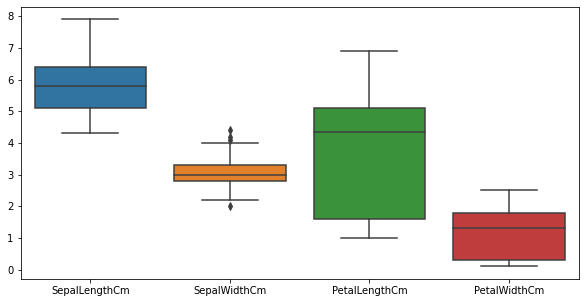

In [10]:

plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

**HeatMap**

In [11]:
cor = data.corr()

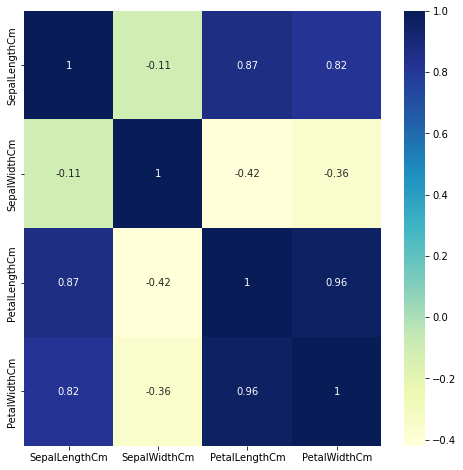

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()


# Step 5: Data Transformation

As we know machine learning not accept the categorical value so that we are transforming values with label encoder


In [13]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species']= le.fit_transform(data['Species'])
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
X = data.iloc[:,0:4]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y = data.iloc[:,-1:]
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


# Step 6: Model Building

In Prediction using Decision Tree Algorithm  we have measurements for which we know the correct species of iris,The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
To test how the model’s performance,this is usually done by splitting the labelled data we have collected into two parts with 75%-25%. One part of the data is used to build the machine learning model, and is called the training data (i.e. X_train and y_train). The rest of the 20% data will be used to test how well the model works; this is called the test data(i.e. X_test, y_test).

X is having all the dependent variables.

Y is having an independent variable (here in this case ‘species’ is an independent variable).

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [18]:
X_train.shape

(112, 4)

In [19]:
y_train.shape

(112, 1)

Here we are using DecisionTreeClassifier to predict our data
After that fitting/training the model on X_train and Y_train using .fit() method.


In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

Then we are predicting on X_test using .predict() method.
And checking accuracy how are model is accurate or how it is properly worikng on data

In [21]:
from sklearn.metrics import accuracy_score
prediction = dt.predict(X_test)
print("Accuracy:",accuracy_score(y_test,prediction))

Accuracy: 0.9736842105263158


In [22]:
from sklearn.metrics import classification_report
print("Report:",classification_report(y_test,prediction))

Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



For this model, the accuracy on the test set is 0.97, which means the model made the right prediction for 97% of the irises in the given dataset. We can expect the model to be correct 97% of the time for predicting the species of new irises.

In [23]:
clsVars = "Species"
allCols = data.columns
print(clsVars)
# counts
print("\n*** Counts ***")
print(data.groupby(data[clsVars]).size())

Species

*** Counts ***
Species
0    50
1    50
2    50
dtype: int64


In [24]:

from sklearn import tree
text_tree = tree.export_text(dt)
print("\n*** Decision Tree Text ***")
print(text_tree)



*** Decision Tree Text ***
|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_0 <= 6.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  6.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: 2



**Decision Tree**

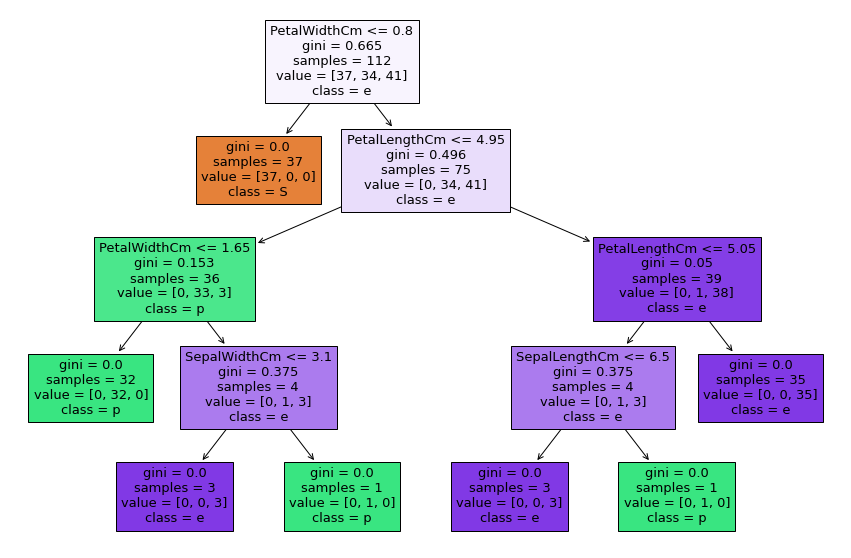

In [25]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dt, 
                feature_names=allCols,  
                class_names=clsVars,
                filled=True)
plt.show()